<a href="https://colab.research.google.com/github/chahatpatel2003/CSCI-167/blob/main/notebook_6_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

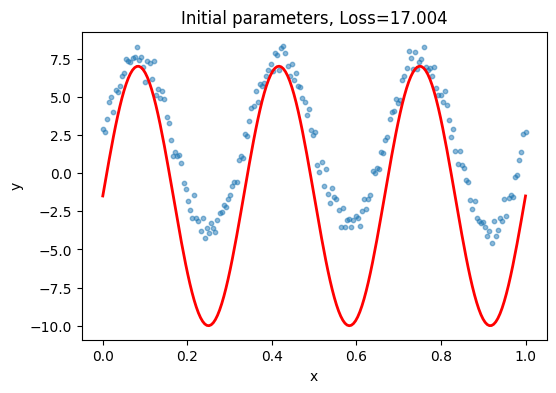

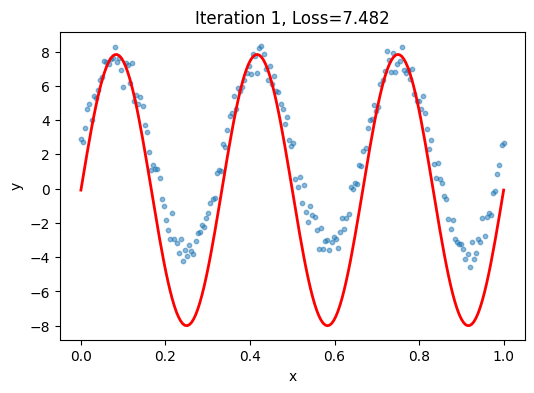

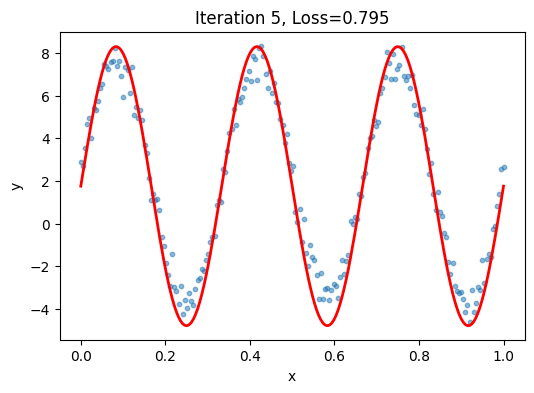

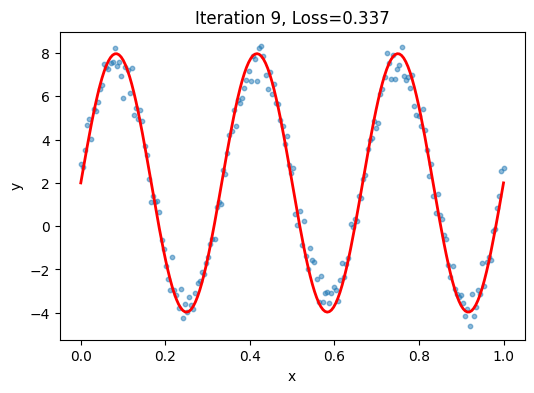

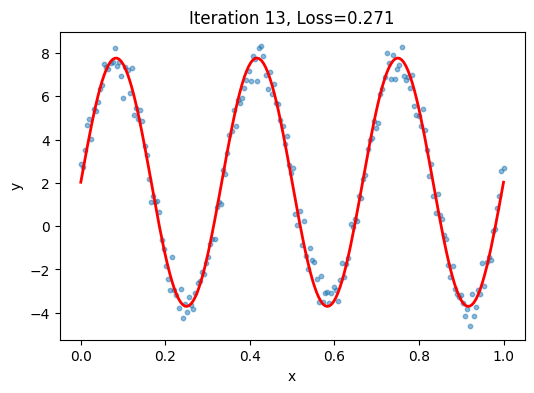

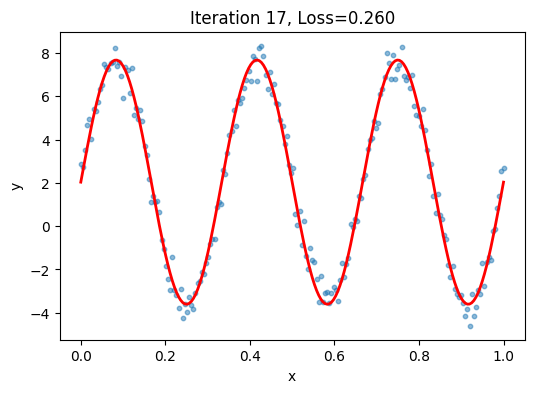

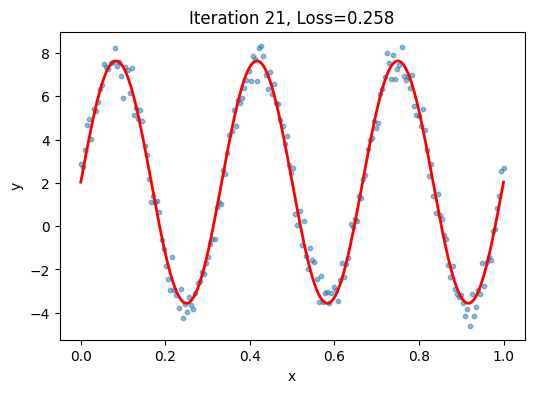

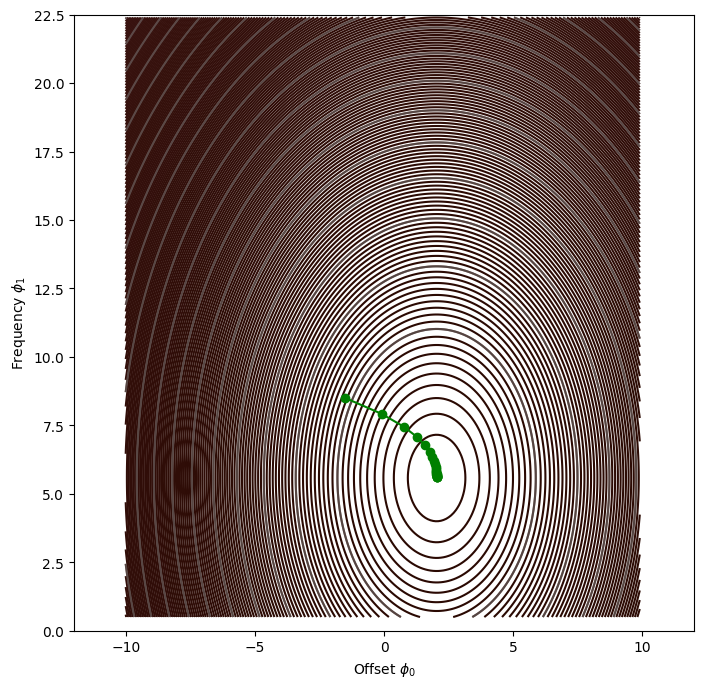

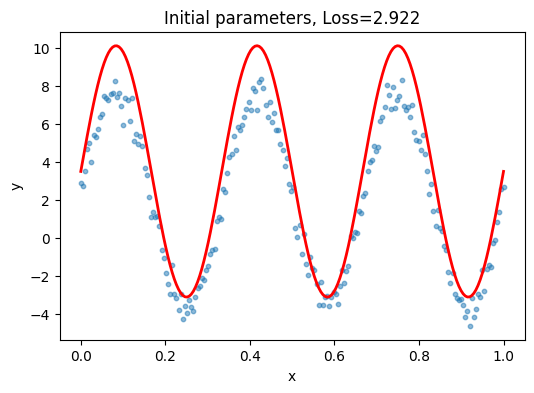

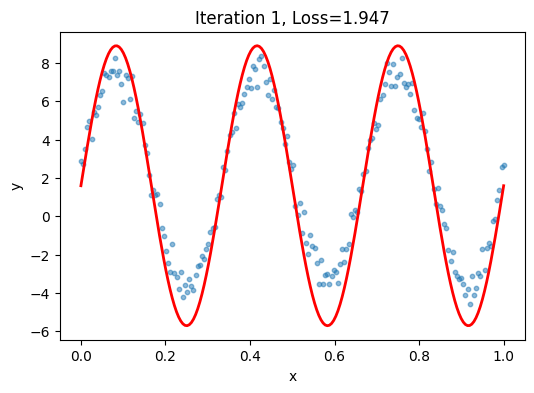

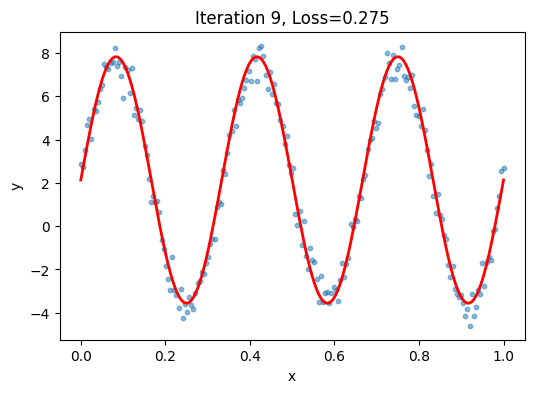

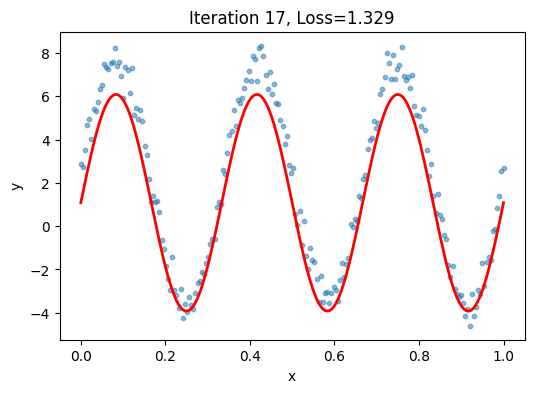

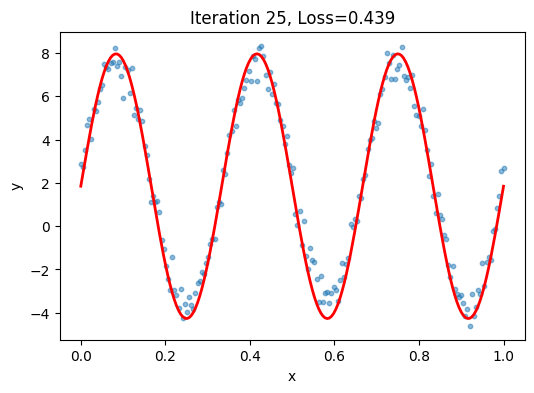

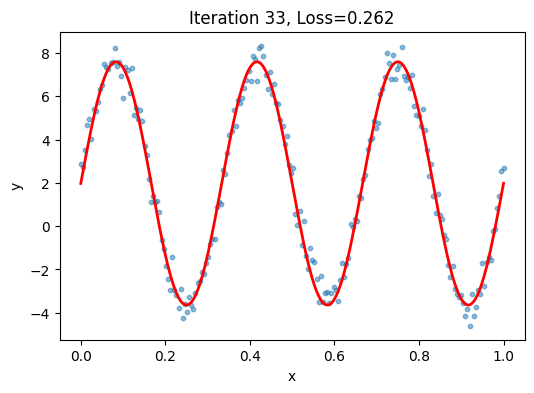

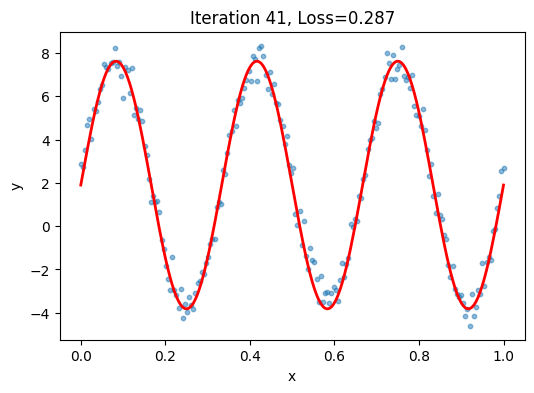

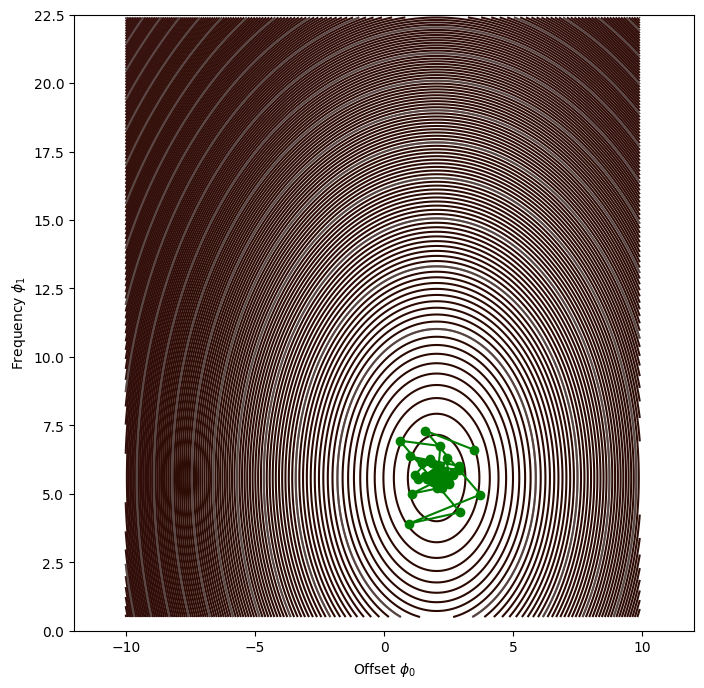

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

np.random.seed(0)
N = 200
x = np.linspace(0,1,N)
true_phi0 = 2.0
true_phi1 = 5.0
noise = 0.5 * np.sin(2*np.pi*3*x) + 0.5*np.random.randn(N)
y = true_phi0 + true_phi1*np.sin(2*np.pi*3*x) + noise
data = np.vstack([x,y])

def model(x, phi):
    return phi[0] + phi[1]*np.sin(2*np.pi*3*x)

def compute_loss(data_x, data_y, model, phi):
    pred = model(data_x, phi)
    diff = pred - data_y
    return np.mean(diff**2)

def draw_loss_function(compute_loss, data, model, phi_iters=None):
    my_colormap_vals_hex = ['2a0902','2b0a03','2c0b04','2d0c05','2e0c06','2f0d07',
                            '300d08','310e09','320f0a','330f0b','34100b','35110c',
                            '36110d','37120e','38120f']
    my_colormap_vals_dec = np.array([int(e,16) for e in my_colormap_vals_hex])
    r = np.floor(my_colormap_vals_dec/(256*256))
    g = np.floor((my_colormap_vals_dec - r*256*256)/256)
    b = my_colormap_vals_dec - r*256*256 - g*256
    my_colormap = ListedColormap(np.vstack([r,g,b]).T/255.0)

    offsets_mesh, freqs_mesh = np.meshgrid(np.arange(-10,10,0.1),
                                           np.arange(0.5,22.5,0.1))
    loss_mesh = np.zeros_like(freqs_mesh)
    for i in range(loss_mesh.shape[0]):
        for j in range(loss_mesh.shape[1]):
            loss_mesh[i,j] = compute_loss(data[0,:], data[1,:], model,
                                          np.array([offsets_mesh[i,j], freqs_mesh[i,j]]))
    fig, ax = plt.subplots(1)
    fig.set_size_inches(8,8)
    ax.contour(offsets_mesh, freqs_mesh, loss_mesh, 256, cmap=my_colormap)
    ax.contour(offsets_mesh, freqs_mesh, loss_mesh, 20, colors='#80808080')
    if phi_iters is not None:
        ax.plot(phi_iters[0,:], phi_iters[1,:], 'go-')
    ax.set_xlim([-12,12])
    ax.set_ylim([0,22.5])
    ax.set_xlabel('Offset $\\phi_{0}$')
    ax.set_ylabel('Frequency $\\phi_{1}$')
    plt.show()

def compute_gradient(data_x, data_y, model, phi):
    pred = model(data_x, phi)
    diff = pred - data_y
    dphi0 = 2 * np.mean(diff)
    dphi1 = 2 * np.mean(diff * np.sin(2*np.pi*3*data_x))
    return np.array([dphi0, dphi1])

def gradient_descent_step_fixed_learning_rate(phi, data, alpha):
    grad = compute_gradient(data[0,:], data[1,:], model, phi)
    return phi - alpha * grad

def stochastic_gradient_descent_step(phi, data, alpha, batch_size):
    N = data.shape[1]
    idx = np.random.permutation(N)[:batch_size]
    grad = compute_gradient(data[0,idx], data[1,idx], model, phi)
    return phi - alpha * grad

def draw_model(data, model, phi, title):
    plt.figure(figsize=(6,4))
    plt.scatter(data[0,:], data[1,:], s=10, alpha=0.5)
    x_line = np.linspace(0,1,200)
    y_line = model(x_line, phi)
    plt.plot(x_line, y_line, 'r-', linewidth=2)
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()


n_steps = 21
phi_all = np.zeros((2,n_steps+1))
phi_all[:,0] = [-1.5,8.5]
loss = compute_loss(data[0,:],data[1,:],model,phi_all[:,0])
draw_model(data,model,phi_all[:,0],f"Initial parameters, Loss={loss:.3f}")

for c_step in range(n_steps):
    phi_all[:,c_step+1] = gradient_descent_step_fixed_learning_rate(phi_all[:,c_step],data,alpha=0.2)
    if c_step%4==0:
        loss = compute_loss(data[0,:],data[1,:],model,phi_all[:,c_step+1])
        draw_model(data,model,phi_all[:,c_step+1],f"Iteration {c_step+1}, Loss={loss:.3f}")

draw_loss_function(compute_loss,data,model,phi_all)

np.random.seed(1)
n_steps = 41
phi_all = np.zeros((2,n_steps+1))
phi_all[:,0] = [3.5,6.6]
loss = compute_loss(data[0,:],data[1,:],model,phi_all[:,0])
draw_model(data,model,phi_all[:,0],f"Initial parameters, Loss={loss:.3f}")

for c_step in range(n_steps):
    phi_all[:,c_step+1] = stochastic_gradient_descent_step(phi_all[:,c_step],data,alpha=0.8,batch_size=5)
    if c_step%8==0:
        loss = compute_loss(data[0,:],data[1,:],model,phi_all[:,c_step+1])
        draw_model(data,model,phi_all[:,c_step+1],f"Iteration {c_step+1}, Loss={loss:.3f}")

draw_loss_function(compute_loss,data,model,phi_all)
